In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Asus\AppData\Local\Temp\ipykernel_3084\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Зависимость времени создания стека от его размера

Построим графики, которые показывают разницу во времени создания стека от его размера для двух различных реализаций: на массиве и на списке. Замеры проводились на достаточном производительом ноутбуку Asus Rog Zephyrus G14 на базе процессора AMD RYZEN 7 5800HS. 

In [2]:
PATH_TO_DATA = "../prj.data"

In [10]:
data_stack_array = pd.read_csv(f"{PATH_TO_DATA}/stack_arr_time.txt")
data_stack_list = pd.read_csv(f"{PATH_TO_DATA}/stack_lst_time.txt")
data_stack_array.sample(10)

,n,time
848,848,11
3837,3837,46
2472,2472,32
3103,3103,46
6459,6459,87
221,221,1
2801,2801,46
4132,4132,50
1193,1193,16
5800,5800,67


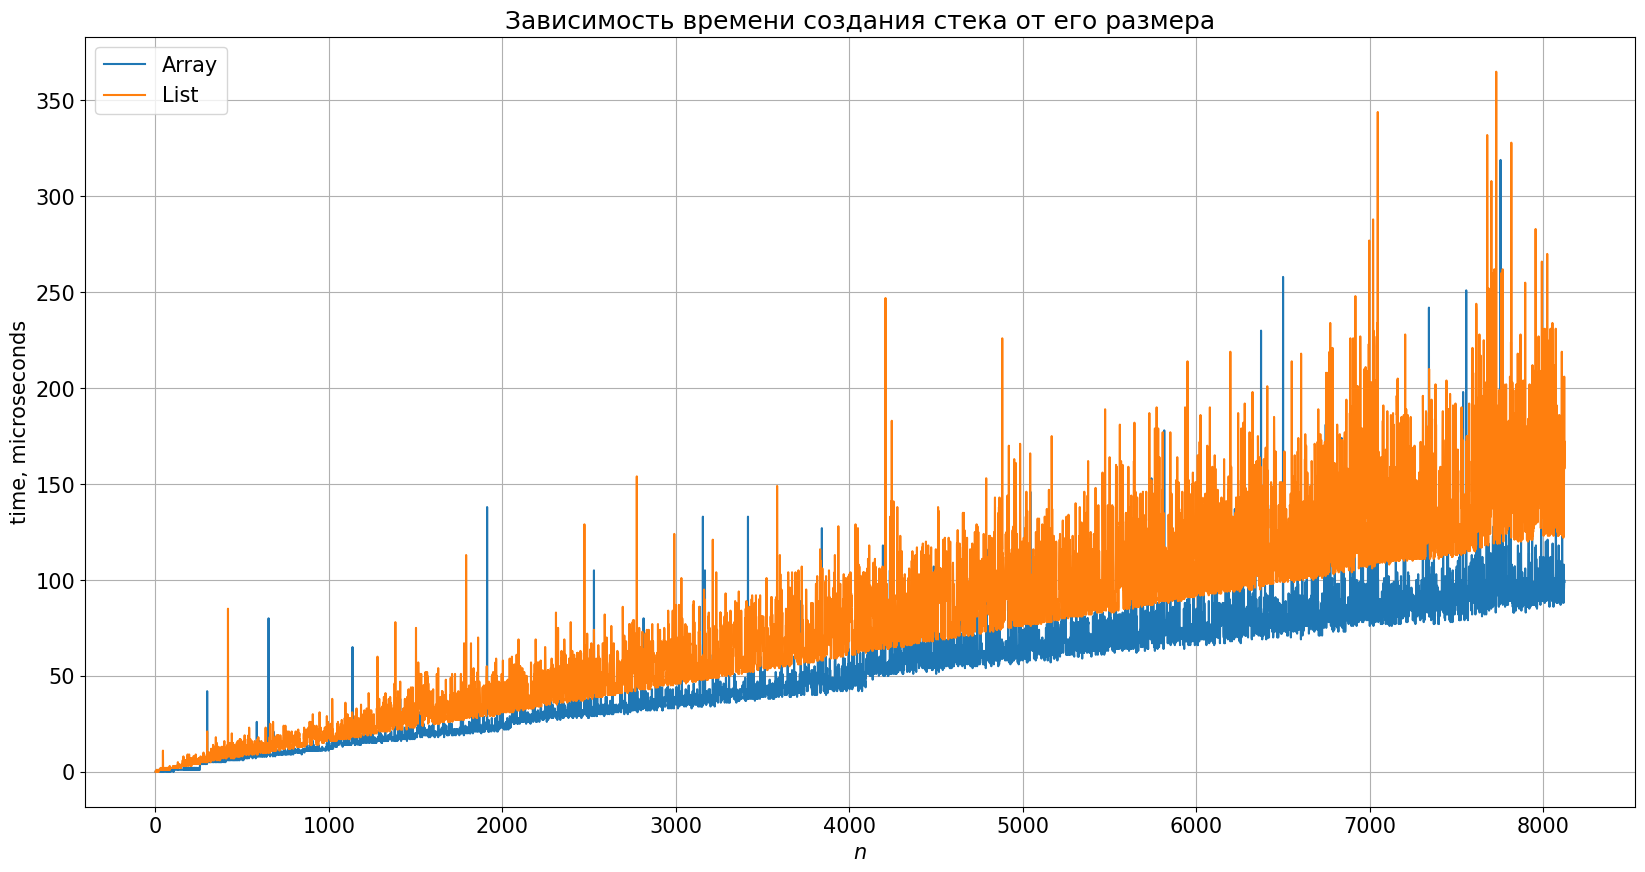

In [11]:
plt.figure(figsize=(20,10))
plt.title("Зависимость времени создания стека от его размера")
plt.rcParams.update({'font.size': 15})
plt.xlabel(fr"$n$")
plt.ylabel("time, microseconds")
plt.grid()
plt.plot(data_stack_array["n"], data_stack_array["time"], label="Array")
plt.plot(data_stack_list["n"], data_stack_list["time"], label="List")
plt.legend()
plt.show()

**Выводы:** Из графиков мы видим, что стек на массиве показывает себя значительно лучше при больших значения $n$, что достаточно логично, ведь именно в реализации на массиве эффективно используется кеш-память и запись нового элемента занимает значительно меньше времени, чем при аллоцировании новой памяти на куче. Однако на графике стека на массиве мы также видим характерные скачки, которые говорят о том, что происходит расширение массива. 